<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/Predict-CO2-Emissions-in-Rwanda/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2019, 2020년의 데이터를 2021년에 가깝게 변환시켜보자

In [5]:
import pandas as pd
import numpy as np

In [6]:
path = 'drive/MyDrive/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [7]:
train.insert(2, 'lat_lon', list(zip(train['latitude'], train['longitude'])))
train.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,lat_lon,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,"(-0.51, 29.29)",29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,...,3664.436218,61085.80957,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.75214,3.750994


In [8]:
locations = train.lat_lon.unique()

In [17]:
# 각 연도와 위치의 조합에 대한 emission 표준 편차 계산 (정규화)
train['location_std'] = train.groupby(['year', 'lat_lon'])['emission'].transform('std')
# 평균
train['location_mean'] = train.groupby(['year','lat_lon'])['emission'].transform('mean')

# normalize
train['emission_norm'] = (train['emission']-train['location_mean']) / train['location_std']

In [18]:
# 2019년과 2020년도의 지역별 location_std 값을 2021년도와 똑같이 조정
train.loc[train['year']==2019,'location_std'] = train.loc[train['year']==2021,'location_std'].values
train.loc[train['year']==2020,'location_std'] = train.loc[train['year']==2021,'location_std'].values

# location_mean도 마찬가지
train.loc[train['year']==2019,'location_mean'] = train.loc[train['year']==2021,'location_mean'].values
train.loc[train['year']==2020,'location_mean'] = train.loc[train['year']==2021,'location_mean'].values

비정규화 할때, 곱하는 표준편차와 더하는 평균은 2021 데이터로 만들어진 값이다.
- 2019, 2020년의 조정된 값은 2021년에 관촬된 평균 및 표준 편차와 매끄럽게 일치할것임

In [19]:
train['emission_new'] = train['emission']

# 정규화 해제
train['emission_new'] = train['emission_norm']*train['location_std']+train['location_mean']

# nan 값 -> 0
train['emission_new'] = train['emission_new'].fillna(0)

In [22]:
train.groupby('year')[['emission', 'emission_new']].describe().T

year                        2019          2020          2021
emission     count  26341.000000  26341.000000  26341.000000
             mean      87.255317     75.992122     82.574217
             std      148.915277    137.024676    146.469076
             min        0.000000      0.000000      0.000000
             25%       10.765267      8.812202     10.078049
             50%       48.575447     42.038097     46.115383
             75%      116.668620    102.174860    109.531790
             max     3167.768000   3073.070000   2901.339000
emission_new count  26341.000000  26341.000000  26341.000000
             mean      82.574217     82.574217     82.574217
             std      146.469076    146.469076    146.469076
             min        0.000000      0.000000      0.000000
             25%       10.093077      9.982540     10.078049
             50%       46.168080     45.820508     46.115383
             75%      109.531439    110.822738    109.531790
             max     2958.910467   2971.831796   2901.339000

<Axes: xlabel='year,week_no'>

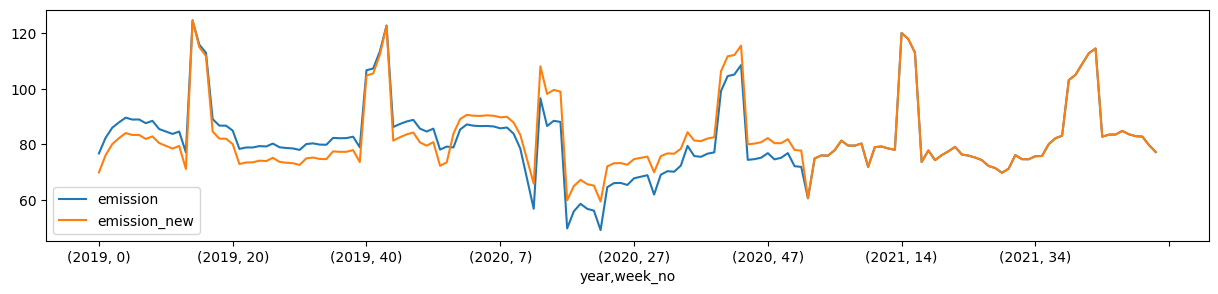

In [23]:
train.pivot_table(index=['year', 'week_no'], values=['emission', 'emission_new']).plot(figsize=(15,3))